In [1]:
import numpy as np
import matplotlib.pyplot as plt

Get Cambridge Emissions Data from BEIS. (2005-2019 covers CO2 only, this is what we want to compare with IPCC remaining budget)
https://www.gov.uk/government/statistics/uk-local-authority-and-regional-carbon-dioxide-emissions-national-statistics-2005-to-2017
https://www.gov.uk/government/collections/uk-local-authority-and-regional-greenhouse-gas-emissions-national-statistics

Remaining budget is CO2 ONLY and is based on Paris Agreement and IPCC reports. The allocation from a global budget to a local budget is based on 'grandfathering' and is from:
https://doi.org/10.1016/j.rset.2022.100030

Combined emissions for Cambridge, East Cambridgeshire, Fenland, Huntingdonshire, South Cambridgeshire minus land use change (to be consistent with IPCC carbon budgeting). Units are kt CO2

In [44]:
# Taken from 2005-2019 local and regional CO2 emissions.xlsx
emissions_k = np.array([8000.4, 7997.0, 7939.0, 7777.4, 7140.8, 7371.5, 6957.9, 7171.9, 7034.1, 6691.8, 6571.1, 6434.7, 6313.7, 6247.3, 6086.5])
lulucf_k    = np.array([2073.0, 2068.4, 2059.9, 2057.8, 2059.2, 2053.0, 2049.7, 2048.5, 2043.0, 2038.1, 2035.5, 2035.5, 2033.1, 2028.6, 2028.4])
years_k     = np.arange(2005,2020)
emissions_k = emissions_k - lulucf_k
print(emissions_k)
print(years_k)

[5927.4 5928.6 5879.1 5719.6 5081.6 5318.5 4908.2 5123.4 4991.1 4653.7
 4535.6 4399.2 4280.6 4218.7 4058.1]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019]


Fit through existing data to get a projection

In [45]:
p = np.polyfit(years_k, emissions_k, 1)
print(p)

[-1.41083214e+02  2.88860987e+05]


Total carbon budget for this combined region is 25.9 MtCO2

In [46]:
budget_total = 25900


Create a carbon emissions strategy where there is a constant reduction in CO2 emissions


In [51]:
years = np.arange(2020,2050)

# Create constant % reduction in emissions per year
co2_cr = emissions_k[-1] * (1-0.137)**(np.arange(1, (years[-1]-years[0])+2))

# extrapolate current trajectory
emissions_p = p[1] + p[0]*years

# Find cumulative emissions
co2_cr_cumsum = np.cumsum(co2_cr)


Now plot the emissions required each year and the total carbon budget

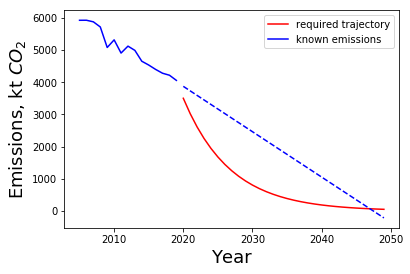

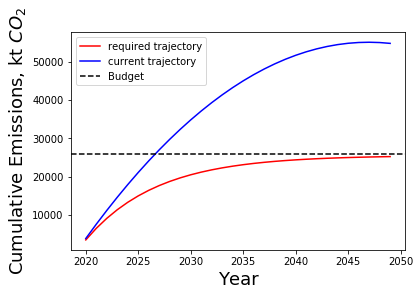

In [53]:
plt.figure()
plt.plot(years, co2_cr, 'r', label='required trajectory')
plt.plot(years_k, emissions_k,'b', label='known emissions')
plt.plot(years, emissions_p, 'b--')
plt.xlabel('Year', size=18)
plt.ylabel('Emissions, kt $CO_2$', size = 18)
plt.legend()

plt.figure()
plt.plot(years, co2_cr_cumsum, 'r', label='required trajectory')
plt.plot(years, np.cumsum(emissions_p), 'b', label='current trajectory')
plt.axhline(y=budget_total, color='k', linestyle='--', label='Budget')
plt.xlabel('Year', size=18)
plt.ylabel('Cumulative Emissions, kt $CO_2$', size = 18)
plt.legend()